In [34]:
import vaex
import illustris_python as il
import numpy as np
import matplotlib as mpl
import shared
import matplotlib.pyplot as plt

In [2]:
base_path = "/Users/users/nastase/PROJECT/"

In [3]:
# dm_pos = il.snapshot.loadSubset(base_path,135,'dm',['Coordinates', 'ParticleIDs'])
# plt.hist2d(np.random.choice(dm_pos[:,0], 1000), np.random.choice(dm_pos[:,1], 1000), norm=mpl.colors.LogNorm(), bins=2048)
# # plt.xlim([10000,20000])
# # plt.ylim([50000,60000])
# plt.xlabel('x [ckpc/h]')
# plt.ylabel('y [ckpc/h]')
# plt.colorbar()

In [17]:
def random_sample_particles(snapshot, x_min, x_max, y_min, y_max, z_min, z_max):
    # Assuming dm_pos is a dictionary with keys 'Coordinates' and 'ParticleIDs'
    dm_pos = il.snapshot.loadSubset(base_path, snapshot, 'dm', ['Coordinates', 'ParticleIDs'])

    # Extracting coordinates
    coordinates = dm_pos['Coordinates']
    particle_ids = dm_pos['ParticleIDs']
    x_coords = coordinates[:, 0]
    y_coords = coordinates[:, 1]
    z_coords = coordinates[:, 2]

    # Finding indices of particles within the specified range
    indices = np.where(
        (x_coords >= x_min) & (x_coords <= x_max) &
        (y_coords >= y_min) & (y_coords <= y_max) &
        (z_coords >= z_min) & (z_coords <= z_max)
    )[0]
    
    particles_within_range = {
        'ParticleIDs': particle_ids[indices],
        'Coordinates': coordinates[indices]
    }


    return particles_within_range

In [47]:
particles = random_sample_particles(125, 40000, 45000, 35000, 40000, 40000, 45000)

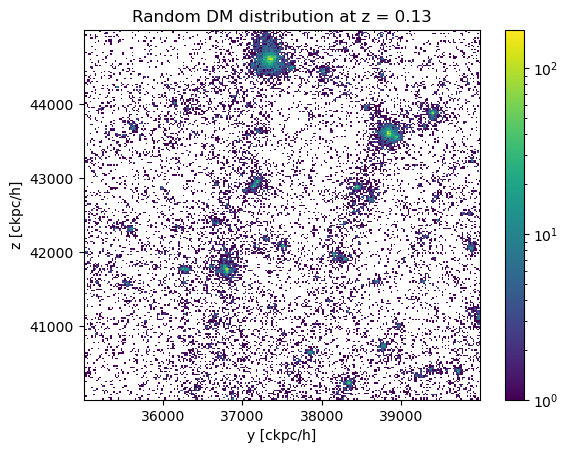

In [48]:
plt.hist2d(particles['Coordinates'][:,1], particles['Coordinates'][:,2], norm=mpl.colors.LogNorm(), bins=256)
# plt.xlim([0,75000])
# plt.ylim([0,75000])
plt.title('Random DM distribution at z = 0.13')
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.colorbar()
plt.savefig('Data/W2_mass_movements/random_matter_125.png')